#  EXAMPLE 2: Plot SPOD spectrum and inspect SPOD modes.
The large-eddy simulation data provided along with this example is a subset of the database of a Mach 0.9 turbulent jet described in [1] and was calculated using the unstructured flow solver Charles developed at Cascade Technologies. If you are using the database in your research or teaching, please include explicit mention of Brès et al. [1]. The test database consists of 5000 snapshots of the symmetric component (m=0) of a round turbulent jet. A physical interpretaion of the SPOD results is given in [2], and a comprehensive discussion and derivation of SPOD and many of its properties can be found in [3].

###   References:
1. G. A. Brès, P. Jordan, M. Le Rallic, V. Jaunet, A. V. G. Cavalieri, A. Towne, S. K. Lele, T. Colonius, O. T. Schmidt, Importance of the nozzle-exit boundary-layer state in subsonic turbulent jets, J. of Fluid Mech. 851, 83-124, 2018
2. Schmidt, O. T. and Towne, A. and Rigas, G. and Colonius, T. and Bres, G. A., Spectral analysis of jet turbulence, J. of Fluid Mech. 855, 953–982, 2018
3. Towne, A. and Schmidt, O. T. and Colonius, T., Spectral proper orthogonal decomposition and its relationship to dynamic mode decomposition and resolvent analysis, J. of Fluid Mech. 847, 821–867, 2018

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from spod import spod

In [3]:
f = h5py.File("jet_data/jetLES.mat", "r")
p = np.swapaxes(f["p"], 0, 2)
x = np.swapaxes(f["x"], 0, 1)
r = np.swapaxes(f["r"], 0, 1)
dt = f["dt"][0][0]

### SPOD of the test database.
Calculate the SPOD of the data matrix 'p' and use the timestep 'dt' between snapshots to obtain the physical frequency 'f'. 'L' is the matrix of modal energies, as before, and 'P' the data matrix of SPOD modes. We leave all other options empty for now.

In [5]:
result = spod(p, dt=dt, debug=1)


SPOD parameters
------------------------------------
Spectrum type             : one-sided (real-valued signal)
No. of snaphots per block : 256
Block overlap             : 128
No. of blocks             : 38
Windowing fct. (time)     : Hamming
Weighting fct. (space)    : uniform
Mean                      : long-time (true) mean

Calculating temporal DFT
------------------------------------

Calculating SPOD
------------------------------------


###   First, we plot the SPOD spectrum.

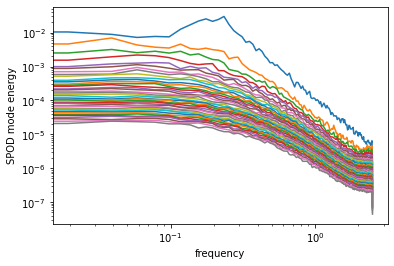

In [6]:
plt.figure()
plt.loglog(result["f"], result["L"])
plt.xlabel("frequency")
plt.ylabel("SPOD mode energy")
plt.show()

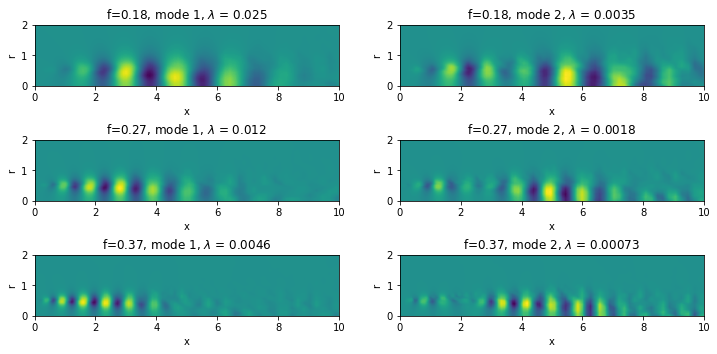

In [11]:
#   Second, we visualize the 1st and 2nd SPOD modes at three frequencies.
plt.figure(figsize=(12, 6))
count = 1
for fi in [10, 15, 20]:
    for mi in [1, 2]:
        plt.subplot(3, 2, count)
        P = np.real(result["P"][fi - 1, :, :, mi - 1])
        vmax = np.max(np.abs(P))
        plt.contourf(x, r, P, 256, vmin=-vmax, vmax=vmax)
        plt.axis("scaled")
        plt.xlabel("x")
        plt.ylabel("r")
        plt.title(
            "f=%.2f, mode %d, $\lambda$ = %.2g"
            % (result["f"][fi - 1], mi, result["L"][fi - 1, mi - 1])
        )
        plt.xlim(0, 10)
        plt.ylim(0, 2)
        count += 1

plt.show()